## Cifar 10 데이터란
- 10개의 클래스에 있는 60000개의 32x32 컬러 이미지
- 클래스당 6000개의 이미지 존재
- 5000개의 훈련 이미지와 10000개의 테스트 이미지가 존재
- 데이터세트 10000개씩 5개의 학습배치와 / 10000개의 테스트 배치 존재

### 데이터 설명
- b'batch_label' : batch 5개중 몇번째 batch인지
- b'labels' : 정답 label
- b'data' : 학습 데이터
- b'filenames' : 실제 이미지 데이터 파일이름

### 라벨
- airplane : 0 / automobile : 1 / bird : 2 / cat : 3 / deer : 4
- dog : 5 / frog : 6 / horse : 7 / ship : 8 / truck : 9

In [9]:
# 데이터 로드 모듈
import tensorflow as tf
import numpy as np
import pickle, os

data_path = 'traindata/cifar-10-batches-py/'

# data load
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    train_data = np.array(data[b'data']).reshape(-1,3,32,32).transpose(0, 2,3,1)
    train_label = np.array(data[b'labels'])
    return train_data, train_label

# 파일 해체 - 학습데이터, 정답라벨 return
def unpickle_maketrain():
    f_list = os.listdir(data_path)
    x_list, y_list = [], []
    for i in f_list:
        x, y = unpickle(data_path+i) # data, label 반환
        x_list.append(x); y_list.append(y)
    train_x = np.concatenate(x_list, axis=0)
    train_y = np.concatenate(y_list, axis=0)
    return train_x, train_y

In [37]:
# history 시각화 모듈
import matplotlib.pyplot as plt

def visualization(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
#     print(hist.history['loss'])
#     print(hist.history['accuracy'])
#     print(hist.history['val_loss'])
#     print(hist.history['val_accuracy'])
    plt.show()
    

In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modeling():
    model = models.Sequential()
    
    # layer 1
    model.add(layers.Conv2D(64, (3,3), input_shape=(32,32,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(64, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    # layer 2
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))

    # layer 3
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

def model_fit(model, train_x, train_y):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    hist = model.fit(train_x, train_y, epochs=200, validation_split=0.3, 
                     callbacks=[early_stopping]
                    )
    return hist

## Main 코드 

(50000, 32, 32, 3) (50000,)
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_125 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_26 (Activation

Epoch 25/200
35000/35000 [==============================] - 13s 384us/sample - loss: 0.3067 - accuracy: 0.8905 - val_loss: 1.1300 - val_accuracy: 0.6142
Epoch 26/200
35000/35000 [==============================] - 13s 385us/sample - loss: 0.2991 - accuracy: 0.8952 - val_loss: 1.0592 - val_accuracy: 0.6533
Epoch 27/200
35000/35000 [==============================] - 13s 385us/sample - loss: 0.2892 - accuracy: 0.8969 - val_loss: 0.8594 - val_accuracy: 0.7115
Epoch 28/200
35000/35000 [==============================] - 13s 385us/sample - loss: 0.2716 - accuracy: 0.9048 - val_loss: 1.0938 - val_accuracy: 0.6368
Epoch 29/200
35000/35000 [==============================] - 13s 384us/sample - loss: 0.2687 - accuracy: 0.9057 - val_loss: 1.1734 - val_accuracy: 0.6170
Epoch 30/200
35000/35000 [==============================] - 13s 384us/sample - loss: 0.2624 - accuracy: 0.9091 - val_loss: 1.1235 - val_accuracy: 0.6320
Epoch 31/200
35000/35000 [==============================] - 13s 385us/sample - los

35000/35000 [==============================] - 13s 385us/sample - loss: 0.0902 - accuracy: 0.9703 - val_loss: 0.8810 - val_accuracy: 0.7191
Epoch 79/200
35000/35000 [==============================] - 14s 386us/sample - loss: 0.0880 - accuracy: 0.9719 - val_loss: 1.0661 - val_accuracy: 0.6833
Epoch 80/200
35000/35000 [==============================] - 13s 385us/sample - loss: 0.0830 - accuracy: 0.9726 - val_loss: 0.9095 - val_accuracy: 0.7167
Epoch 81/200
35000/35000 [==============================] - 14s 386us/sample - loss: 0.0871 - accuracy: 0.9712 - val_loss: 1.1020 - val_accuracy: 0.6711
Epoch 82/200
35000/35000 [==============================] - 13s 385us/sample - loss: 0.0854 - accuracy: 0.9709 - val_loss: 1.1922 - val_accuracy: 0.6597
Epoch 83/200
35000/35000 [==============================] - 13s 386us/sample - loss: 0.0850 - accuracy: 0.9721 - val_loss: 1.0393 - val_accuracy: 0.6924
Epoch 84/200
35000/35000 [==============================] - 14s 386us/sample - loss: 0.0828 - a

35000/35000 [==============================] - 13s 376us/sample - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.9607 - val_accuracy: 0.7133
Epoch 132/200
35000/35000 [==============================] - 13s 375us/sample - loss: 0.0555 - accuracy: 0.9823 - val_loss: 1.0465 - val_accuracy: 0.7001
Epoch 133/200
35000/35000 [==============================] - 13s 377us/sample - loss: 0.0575 - accuracy: 0.9831 - val_loss: 0.9263 - val_accuracy: 0.7174
Epoch 134/200
35000/35000 [==============================] - 13s 377us/sample - loss: 0.0501 - accuracy: 0.9844 - val_loss: 1.0015 - val_accuracy: 0.7054
Epoch 135/200
35000/35000 [==============================] - 13s 376us/sample - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.8863 - val_accuracy: 0.7368
Epoch 136/200
35000/35000 [==============================] - 13s 377us/sample - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.9974 - val_accuracy: 0.7129
Epoch 137/200
35000/35000 [==============================] - 13s 377us/sample - loss: 0.05

35000/35000 [==============================] - 13s 377us/sample - loss: 0.0429 - accuracy: 0.9880 - val_loss: 1.0274 - val_accuracy: 0.7060
Epoch 185/200
35000/35000 [==============================] - 13s 377us/sample - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.9373 - val_accuracy: 0.7267
Epoch 186/200
35000/35000 [==============================] - 13s 376us/sample - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.9806 - val_accuracy: 0.7205
Epoch 187/200
35000/35000 [==============================] - 13s 378us/sample - loss: 0.0404 - accuracy: 0.9874 - val_loss: 1.1261 - val_accuracy: 0.6796
Epoch 188/200
35000/35000 [==============================] - 13s 378us/sample - loss: 0.0455 - accuracy: 0.9864 - val_loss: 1.0908 - val_accuracy: 0.6889
Epoch 189/200
35000/35000 [==============================] - 13s 377us/sample - loss: 0.0412 - accuracy: 0.9880 - val_loss: 1.0006 - val_accuracy: 0.7057
Epoch 190/200
35000/35000 [==============================] - 13s 378us/sample - loss: 0.03

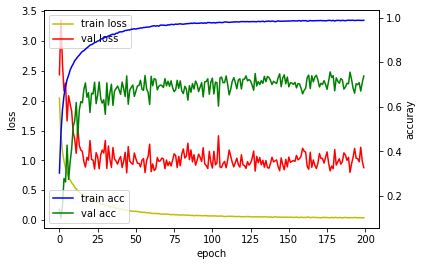

50000/50000 [==============================] - 6s 119us/sample - loss: 0.4633 - accuracy: 0.8569
[0.46331367990493777, 0.85688]


In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 30) # 조기종료 콜백함수 정의

dropout_rate = 0.5

if __name__ == '__main__':
    data_x, data_y = unpickle_maketrain()
    data_x = data_x.astype(np.float64)/255.    
    print(data_x.shape, data_y.shape)
    
    # 모델링 및 학습
    model = modeling()
    model.summary()
    hist = model_fit(model, data_x, data_y)
    visualization(hist)
    result = model.evaluate(data_x, data_y)
    print(result)

In [61]:
plt.savefig('batchnormalization 추가0.87.png')

<Figure size 432x288 with 0 Axes>

## KFold 용

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

def model_fit(model, data_x, data_y):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    cv_accuracy = []
    for train_index, test_index in kfold.split(data_x):
        train_x, test_x = data_x[train_index], data_x[test_index]
        train_y, test_y = data_y[train_index], data_y[test_index]

        hist = model.fit(train_x, train_y, epochs=100, callbacks=[early_stopping])
        visualization(hist)
        
        pred = model.predict(test_x)
        accuracy = np.round(accuracy_score(test_y, pred), 4)
        cv_accuracy.append(accuracy)
    return np.mean(cv_accuracy)

## Accuracy 64 Model
- 적당한 Layer와, Dense 층 필요
- 삽질(시행착오)
    - layer 셋트 2개 만 하고서 진행했을때 정확도 낮았음
    - Dense 층을 무한히 늘렸을때 의미없음x
    

In [ ]:
# 0.64 model
import tensorflow as tf
from tensorflow.keras import layers, models

def modeling():
    model = models.Sequential()
    
    # layer 1
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    # layer 2
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    # layer 3
    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

def model_fit(model, train_x, train_y):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    hist = model.fit(train_x, train_y, epochs=100, validation_split=0.3, callbacks=[early_stopping])
    return hist

## Accuracy 0.82 Model
- Filter 수 증가시킴
- 삽질(시행착오)
    - 필터수를 더 늘렸을 때 안좋은 결과를 보임 (적정선의 필터가 필요)
    - 

In [ ]:
## 0.82
import tensorflow as tf
from tensorflow.keras import layers, models

def modeling():
    model = models.Sequential()
    
    # layer 1
    model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    # layer 2
    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    # layer 3
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

def model_fit(model, train_x, train_y):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    hist = model.fit(train_x, train_y, epochs=100, validation_split=0.3, callbacks=[early_stopping])
    return hist

## Accuracy 0.84 Model
- activation layer 분리
- Batch Normalization 추가
- Conv2D 연산 다음에 바로 추가 필요!, Activation 전에\
- 삽질(시행착오)
    - Activation 다음에 BatchNormalization 했을 때 더 감소

In [ ]:
# 0.84 model
import tensorflow as tf
from tensorflow.keras import layers, models

def modeling():
    model = models.Sequential()
    
    # layer 1
    model.add(layers.Conv2D(64, (3,3), input_shape=(32,32,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(64, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    # layer 2
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))

    # layer 3
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

def model_fit(model, train_x, train_y):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    hist = model.fit(train_x, train_y, epochs=100, validation_split=0.3, callbacks=[early_stopping])
    return hist

## Accuracy 0.87~0.89
- Dense 층 좀더 압축
- epochs 늘려도 성능이 더 좋게 나오지는 않음.
- 안정적인 0.9 를 위해선 좀더 다른방법 찾을 필요 있음


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modeling():
    model = models.Sequential()
    
    # layer 1
    model.add(layers.Conv2D(64, (3,3), input_shape=(32,32,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(64, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    # layer 2
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))

    # layer 3
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv2D(256, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.MaxPooling2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

def model_fit(model, train_x, train_y):
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    hist = model.fit(train_x, train_y, epochs=100, validation_split=0.3, callbacks=[early_stopping])
    return hist